## Red and White Wine Quality Analysis 

**Data BootCamp - Fall 2018 MBA**

**Caroline Packowski, Gabrielle Sart and Kaitlin Slattery**


### Introduction 

Need to write up 

### Packages

Need to write up 

In [59]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import datetime as dt                 # check today's date 
import sys                            # check Python version 
import numpy as np                    # scientific computing   
import seaborn as sns                 # data visualization 
import statsmodels.api as sm          # statistical modeling

### DataSet Information 

Need to write up 

Not sure where we want to put it all, but need to go through each variable 

Quality is dependent variable, everything else is independent (although, they may be interrelated - chemistry!) 

In [50]:
url_white = "https://raw.githubusercontent.com/krs520/Data-Bootcamp-Project/master/wineQualityWhites.csv" 
url_red = "https://raw.githubusercontent.com/krs520/Data-Bootcamp-Project/master/wineQualityReds.csv"

dfwhite = pd.read_csv(url_white) # Read in dataset on white wine quality 
dfred = pd.read_csv(url_red) # Read in dataset on red wine quality 

dfwhite = dfwhite.drop('Unnamed: 0',axis=1) # Drop the first column that is a counter 
dfred = dfred.drop('Unnamed: 0',axis=1) # Drop the first column that is a counter

**White Wine Data Set Information**

In [51]:
print(dfwhite)
print(dfwhite.shape)
print(dfwhite.columns)

      fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0               7.0             0.270         0.36           20.70      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            8.50      0.058   
4               7.2             0.230         0.32            8.50      0.058   
5               8.1             0.280         0.40            6.90      0.050   
6               6.2             0.320         0.16            7.00      0.045   
7               7.0             0.270         0.36           20.70      0.045   
8               6.3             0.300         0.34            1.60      0.049   
9               8.1             0.220         0.43            1.50      0.044   
10              8.1             0.270         0.41            1.45      0.033   
11              8.6         

**Red Wine Data Set Information**

In [52]:
print(dfred)
print(dfred.shape)
print(dfred.columns)

      fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

In [53]:
# Want to merge it into one dataset, each with another column for Type - Red or White

dfwhite['type']='White' # Added a column to dfwhite for 'Type' = 'White'
dfred['type']='Red' # Added a column to dfred for 'Type' = 'Red'

frames = [dfwhite, dfred]
df = pd.concat(frames) # Create a new dataframe merging dfwhite and dfred 

df

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,White
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,White
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,White
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,White
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,White
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,White
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,White
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.0,6,White


In [54]:
df.describe() # Generate describtive statistics on dataset 

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
fixed.acidity           6497 non-null float64
volatile.acidity        6497 non-null float64
citric.acid             6497 non-null float64
residual.sugar          6497 non-null float64
chlorides               6497 non-null float64
free.sulfur.dioxide     6497 non-null float64
total.sulfur.dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


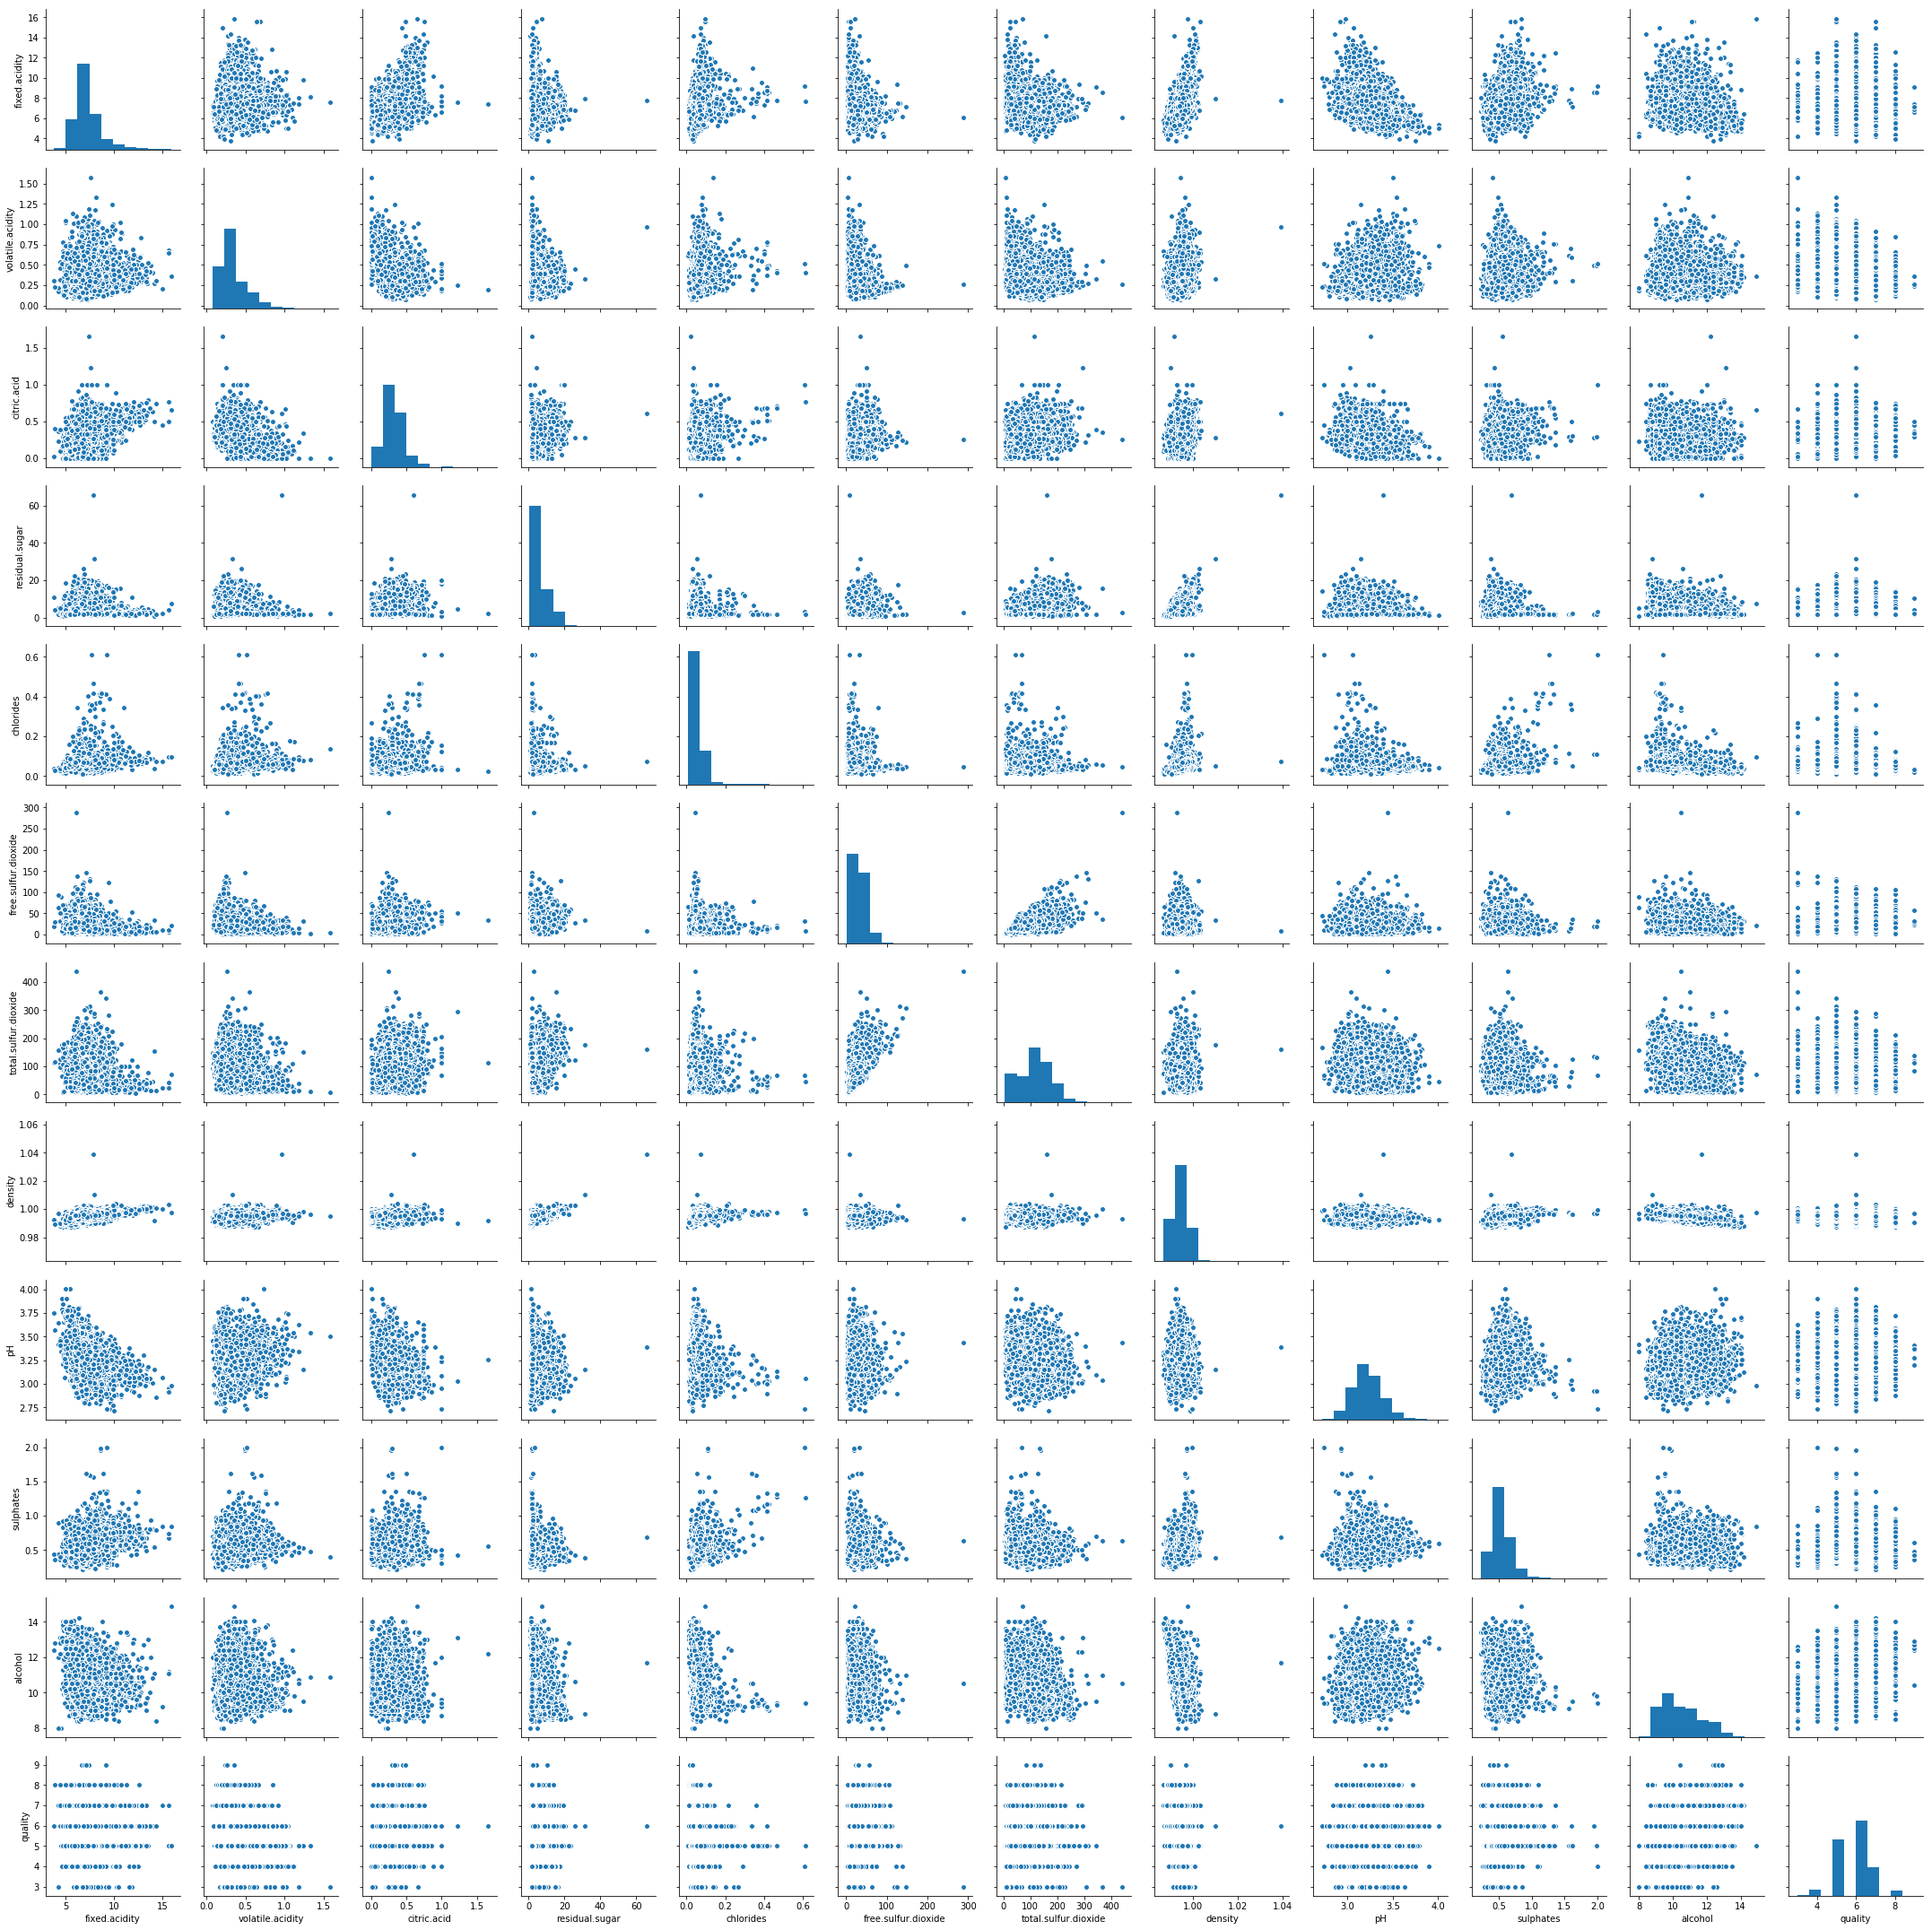

In [58]:
sns.pairplot(df) # WOAH, lots going on here - i'm just experimenting really

# i was skimming this article - need to read closer https://towardsdatascience.com/linear-regression-using-python-ce21aa90ade6